In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib as plt
import numpy as np

TEST_SIZE = 0.2

In [2]:
df = pd.read_csv('emnist-letters.csv')
# Viene diviso il dataset in train e test set
train_df, test_df = train_test_split(df, test_size = TEST_SIZE, random_state = 42)
# Viene diviso il train set in train e validation set
train_df, val_df = train_test_split(train_df, test_size = TEST_SIZE, random_state = 42)

train_x = train_df.iloc[:,1:].to_numpy().reshape(-1, 28, 28, 1)/255
train_y = train_df.iloc[:,0].to_numpy()-1

val_x = val_df.iloc[:,1:].to_numpy().reshape(-1, 28, 28, 1)/255
val_y = val_df.iloc[:,0].to_numpy()-1

test_x = test_df.iloc[:,1:].to_numpy().reshape(-1, 28, 28, 1)/255
test_y = test_df.iloc[:,0].to_numpy()-1

Epoch 1/1000


c:\Users\savel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.0767 - loss: 3.2085 - val_accuracy: 0.3245 - val_loss: 2.9487
Epoch 2/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.3510 - loss: 2.8210 - val_accuracy: 0.4235 - val_loss: 2.4134
Epoch 3/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.4407 - loss: 2.3091 - val_accuracy: 0.4925 - val_loss: 2.0419
Epoch 4/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.5087 - loss: 1.9824 - val_accuracy: 0.5389 - val_loss: 1.8143
Epoch 5/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.5593 - loss: 1.7699 - val_accuracy: 0.5702 - val_loss: 1.6602
Epoch 6/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.5862 - loss: 1.6177 - val_accuracy: 0.5909 - val_loss: 1.5479
Epoch 7/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.6028 - loss: 1.5203 - val_accuracy: 0.6100 - val_loss: 1.4613
Epoch 8/1000
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.6206 - loss: 1.4304 - val_a

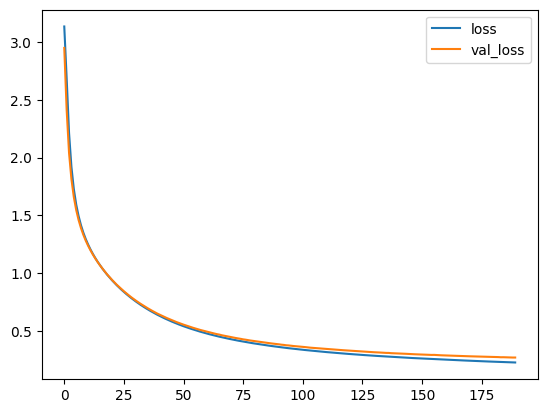

In [3]:
# Puoi aggiungere un layer di dropuot  layers.Dropout(0.3)
model = keras.models.Sequential([keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='tanh', input_shape=(28, 28, 1)),
                                 keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
                                 keras.layers.Conv2D(filters=48, kernel_size=(5,5), activation='tanh'),
                                 keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(120, activation='tanh'),
                                 keras.layers.Dense(84, activation='tanh'),
                                 keras.layers.Dense(26, activation='softmax')
                                 ])
initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=initial_learning_rate,
                                                          decay_steps=1000,
                                                          decay_rate=0.96,
                                                          staircase=True)
opt = keras.optimizers.Nadam(learning_rate = lr_schedule)


model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, min_delta=0.001, restore_best_weights=True)

history = model.fit(train_x, train_y,
                    epochs=1000,
                    batch_size=512,
                    callbacks=[early_stopping_cb],
                    validation_data=(val_x, val_y))

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

print("Number of epochs: {}".format(history_df['val_loss'].idxmin()))
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))